# PII DETECTION AND REDACTION

In this notebook, we will be using the `pii` library to detect and redact PII (Personally Identifiable Information) from text.

## Step 1: Install and import the required and necessary libraries

In [ ]:
# Install required libraries
%pip install easyocr spacy

In [1]:
# Import necessary libraries
import easyocr
import spacy
from PIL import Image

## Step 2: Check and toggle the GPU or CPU for computation speedup

In [2]:
import torch

# Function to toggle between CPU and GPU
def get_device(use_gpu=True):
    if use_gpu and torch.cuda.is_available():
        print("Using GPU")
        return torch.device("cuda")
    else:
        print("Using CPU")
        return torch.device("cpu")


# Default to GPU
device = get_device(use_gpu=True)

# Example: Moving a tensor to the selected device
x = torch.randn(3, 3).to(device)
print(x)

Using GPU
tensor([[ 1.4413, -0.8337,  1.8729],
        [-0.0067, -0.1214,  0.8972],
        [ 1.0939, -0.7590,  2.0411]], device='cuda:0')


## Step 3: Initialize EasyOCR and SpaCy

In [3]:
# Initialize EasyOCR and SpaCy
reader = easyocr.Reader(['en'], gpu=True)  # OCR with GPU support
nlp = spacy.load('en_core_web_sm')        # SpaCy NLP model for NER

## Step 4: Write a function to OCR an image and extract text

In [ ]:
# Function to perform OCR and extract text
def extract_text(image_path, reader):
    results = reader.readtext(image_path, detail=0)  # Extract text without bounding box details
    return " ".join(results)  # Combine all extracted text into a single string

# Example usage
image_path = "image path"  # Replace with your image path
extracted_text = extract_text(image_path, reader)
print("Extracted Text:")
print(extracted_text)

Extracted Text:
Duncan Murchison Huntington, NY 11743 | (631) 358-6777 duncancmurchison @ gmail.com LinkedIn GitHub Portfolio PROFESSIONAL PROFILE am a versatile and solutions-driven software developer with a strong focus O collaboration and continuous growth. enjoy tackling complex problems, communicating ideas clearly, and delivering high-quality work under pressure. Im passionate about building impactful solutions and constantly expanding my technical and professional skills. EDUCA TION Southern New Hampshire University, Manchester; NH 03106 Bachelor of Science in Computer Science, Concentration in Data Security June 2025 GPA 3.48 Member of Coding United and Multicultural STEM Community clubs CORE COMPETENCIES & CERTIFICA TION Certifications: IBM Network Security Database Vulnerabilities; AWS Cloud 10L, App Academy Full Stack Engineering Bootcamp Languages: JavaScript; Python, Ruby, Java, C++, jQuery, SQL, HTMLICSS Tools: Flask, Rails, React:js, Node:js, Docker; Kubernetes, MongoDB,

## Step 5: Write a function to detect and redact PII entities

In [21]:
import re

# Function to detect and redact PII entities using SpaCy and regex
def redact_pii(text):
    """
    Detect and redact PII (emails, phone numbers, zip codes, etc.) from the text.

    Args:
        text (str): The input text to process.

    Returns:
        str: The text with PII redacted.
    """
    # Process the text with SpaCy
    doc = nlp(text)
    redacted_text = text

    # Redact specific entities detected by SpaCy
    for ent in doc.ents:
        print(f"Entity: {ent.text}, Label: {ent.label_}")
        if ent.label_ in ['PERSON']:  # Only redact PERSON entities
            redacted_text = re.sub(r'\b' + re.escape(ent.text) + r'\b', '[REDACTED]', redacted_text)

    # Custom regex patterns for emails, phone numbers, and zip codes
    email_pattern = r'[a-zA-Z0-9._%+-]+\s*@\s*[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    phone_pattern = r'\b(?:\+?1[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b'
    zip_code_pattern = r'\b\d{5}(?:-\d{4})?\b'

    # Redact emails
    redacted_text = re.sub(email_pattern, '[REDACTED EMAIL]', redacted_text)
    # Redact phone numbers
    redacted_text = re.sub(phone_pattern, '[REDACTED PHONE]', redacted_text)
    # Redact zip codes
    redacted_text = re.sub(zip_code_pattern, '[REDACTED ZIP]', redacted_text)

    return redacted_text

## Step 6: Put it together and test

Extracted Text:
Duncan Murchison Huntington, NY 11743 | (631) 358-6777 duncancmurchison @ gmail.com LinkedIn GitHub Portfolio PROFESSIONAL PROFILE am a versatile and solutions-driven software developer with a strong focus O collaboration and continuous growth. enjoy tackling complex problems, communicating ideas clearly, and delivering high-quality work under pressure. Im passionate about building impactful solutions and constantly expanding my technical and professional skills. EDUCA TION Southern New Hampshire University, Manchester; NH 03106 Bachelor of Science in Computer Science, Concentration in Data Security June 2025 GPA 3.48 Member of Coding United and Multicultural STEM Community clubs CORE COMPETENCIES & CERTIFICA TION Certifications: IBM Network Security Database Vulnerabilities; AWS Cloud 10L, App Academy Full Stack Engineering Bootcamp Languages: JavaScript; Python, Ruby, Java, C++, jQuery, SQL, HTMLICSS Tools: Flask, Rails, React:js, Node:js, Docker; Kubernetes, MongoDB,

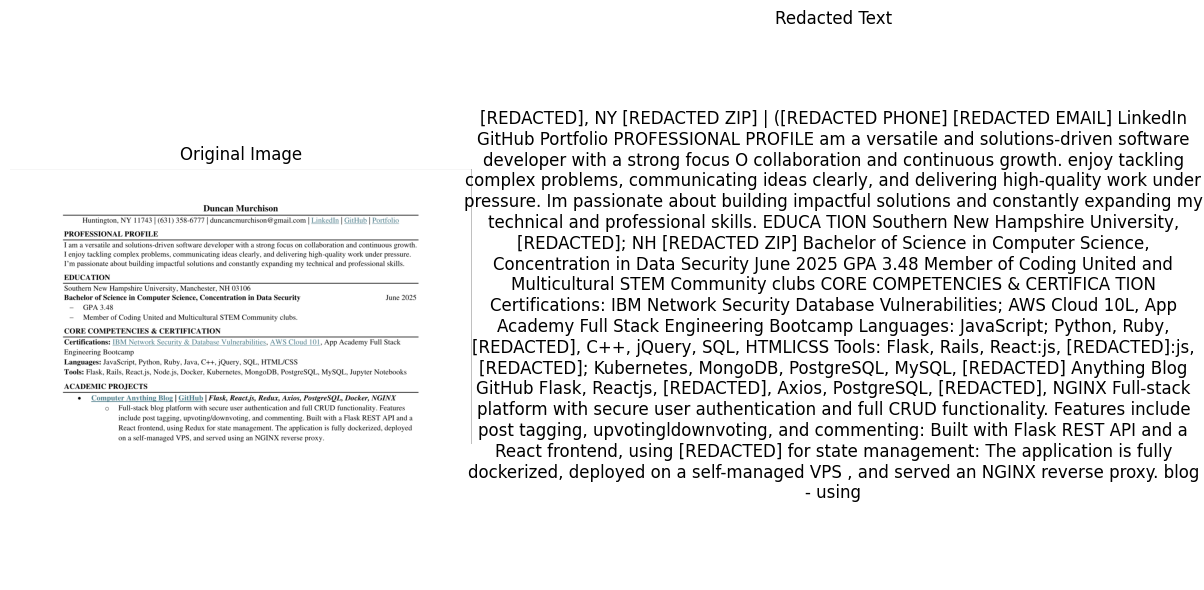

In [ ]:
# Function to display the original image and redacted text side by side
import matplotlib.pyplot as plt

def display_results(image, redacted_text):
    plt.figure(figsize=(12, 6))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original Image")

    # Display the redacted text
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, redacted_text, fontsize=12, wrap=True, ha="center", va="center")
    plt.axis("off")
    plt.title("Redacted Text")

    plt.tight_layout()
    plt.show()


# Final function to process the image and display results
def process_image(image_path, reader):
    # Step 1: Extract text using EasyOCR
    extracted_text = extract_text(image_path, reader)
    print("Extracted Text:")
    print(extracted_text)

    # Step 2: Redact PII from the extracted text
    redacted_text = redact_pii(extracted_text)
    print("\nRedacted Text:")
    print(redacted_text)

    # Step 3: Display the original image and redacted text side by side
    image = Image.open(image_path)
    display_results(image, redacted_text)

# Example usage
image_path = "image_path"  # Replace with your image path
process_image(image_path, reader)